In [76]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



In [77]:

train_data = pd.read_csv("C:\\Users\\T440\\Desktop\\dataset\\train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [78]:
test_data = pd.read_csv("C:\\Users\\T440\\Desktop\\dataset\\test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Preprocessing Data

In [79]:
# Calculate the mean age
mean_age = train_data['Age'].mean()

# Fill missing values in the 'Age' column with the mean age
train_data['Age'].fillna(mean_age, inplace=True)
test_data['Age'].fillna(mean_age, inplace=True)

# Calculate the mode of the 'Embarked' column
mode_embarked = train_data['Embarked'].mode()[0]

# Fill missing values in the 'Embarked' column with the mode
train_data['Embarked'].fillna(mode_embarked, inplace=True)
test_data['Embarked'].fillna(mode_embarked, inplace=True)

# Calculate the median fare
median_fare = train_data['Fare'].median()

# Fill missing values in the 'Fare' column with the median fare
train_data['Fare'].fillna(median_fare, inplace=True)
test_data['Fare'].fillna(median_fare, inplace=True)


### By Random Forest

In [80]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]


features = ["Pclass", "Sex", "SibSp", "Parch", "Age"]

X = pd.get_dummies(train_data[features]) # one hot encoding
X_test = pd.get_dummies(test_data[features]) 
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)
print(f'The models accuracy is: {model.score(X, y)}')
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

The models accuracy is: 0.8428731762065096
Your submission was successfully saved!


### Plot the important featutres

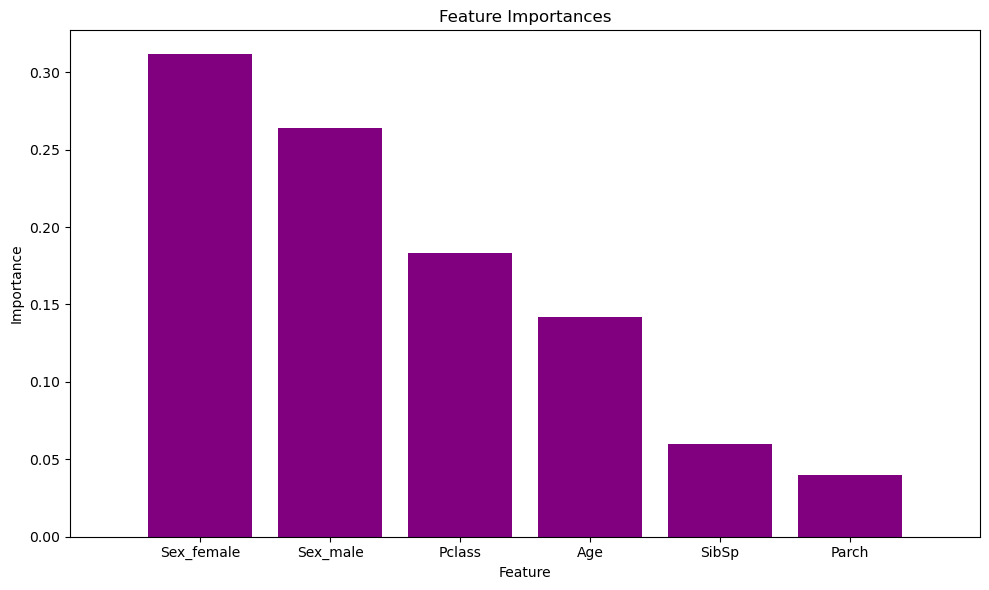

In [81]:
import matplotlib.pyplot as plt

# Get feature importances from the model
importances = model.feature_importances_

# Get the names of the features
feature_names = X.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
sorted_feature_names = [feature_names[i] for i in indices]

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center",color='purple')
plt.xticks(range(X.shape[1]), sorted_feature_names)
plt.xlim([-1, X.shape[1]])
plt.ylabel("Importance")
plt.xlabel("Feature")
plt.tight_layout()
plt.show()


### By Decision Tree

In [82]:
from sklearn.tree import DecisionTreeClassifier

y = train_data["Survived"]


features = ["Pclass", "Sex", "SibSp", "Parch", "Age", "Embarked"]

X = pd.get_dummies(train_data[features]) # one hot encoding
X_test = pd.get_dummies(test_data[features]) 

# Initialize the DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier(max_depth=5, random_state=1)

# Fit the model to the training data
decision_tree_model.fit(X, y)

# Make predictions on the test data
decision_tree_predictions = decision_tree_model.predict(X_test)

# Evaluate the model's performance
print(f'The decision tree model accuracy is: {decision_tree_model.score(X, y)}')

# Save the predictions to a CSV file
decision_tree_output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': decision_tree_predictions})
decision_tree_output.to_csv('decision_tree_submission.csv', index=False)
print("Decision tree model submission was successfully saved!")


The decision tree model accuracy is: 0.8507295173961841
Decision tree model submission was successfully saved!
